In [1]:
import torch, torchvision
from torch import nn
from torch import optim
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt

c:\Users\tothm\.conda\envs\ai_learn\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] A megadott eljárás nem található'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [4]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import copy

In [5]:
numb_batch = 64

In [7]:
T = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])
train_data = torchvision.datasets.MNIST('mnist_data', train=True, download=True, transform=T)
val_data = torchvision.datasets.MNIST('mnist_data', train=False, download=True, transform=T)

train_dl = torch.utils.data.DataLoader(train_data, batch_size = numb_batch)
val_dl = torch.utils.data.DataLoader(val_data, batch_size = numb_batch)

In [8]:
def create_lenet():
    model = nn.Sequential(
        nn.Conv2d(1, 6, 5, padding=2),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5, padding=0),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Flatten(),
        nn.Linear(400, 120),
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10)
    )
    return model

In [19]:
# def validate(model, data):
#     total = 0
#     correct = 0
#     for i, (images, labels) in enumerate(data):
#         images = images.cuda()
#         x = model(images)
#         value, pred = torch.max(x,1)
#         pred = pred.data.cpu()
#         total += x.size(0)
#         correct += torch.sum(pred == labels)
#     return correct*100./total

def validate(model, data, device):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(data):
        images = images.to(device)
        labels = labels.to(device)
        
        x = model(images)
        _, pred = torch.max(x, 1)
        pred = pred.cpu()  # Move predictions back to CPU if they were on GPU
        total += labels.size(0)
        correct += torch.sum(pred == labels.cpu())  # Move labels back to CPU for comparison

    return correct * 100. / total


In [20]:
def train(numb_epoch=3, lr=1e-3, device="cpu"):
    accuracies = []
    cnn = create_lenet().to(device)
    cec = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn.parameters(), lr=lr)
    max_accuracy = 0
    for epoch in range(numb_epoch):
        for i, (images, labels) in enumerate(train_dl):
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            pred = cnn(images)
            loss = cec(pred, labels)
            loss.backward()
            optimizer.step()
        accuracy = float(validate(cnn, val_dl, device))
        # accuracy = float(validate(cnn, val_dl, device))
        accuracies.append(accuracy)
        if accuracy > max_accuracy:
            best_model = copy.deepcopy(cnn)
            max_accuracy = accuracy
            print("Saving Best Model with Accuracy: ", accuracy)
        print('Epoch:', epoch+1, "Accuracy :", accuracy, '%')
    plt.plot(accuracies)
    return best_model

In [21]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
    print("No Cuda Available")
device

#device = torch.device("cuda:0")


No Cuda Available


device(type='cpu')

Saving Best Model with Accuracy:  95.73999786376953
Epoch: 1 Accuracy : 95.73999786376953 %
Saving Best Model with Accuracy:  97.11000061035156
Epoch: 2 Accuracy : 97.11000061035156 %
Saving Best Model with Accuracy:  97.95999908447266
Epoch: 3 Accuracy : 97.95999908447266 %
Saving Best Model with Accuracy:  98.20999908447266
Epoch: 4 Accuracy : 98.20999908447266 %
Saving Best Model with Accuracy:  98.4800033569336
Epoch: 5 Accuracy : 98.4800033569336 %
Saving Best Model with Accuracy:  98.55999755859375
Epoch: 6 Accuracy : 98.55999755859375 %
Saving Best Model with Accuracy:  98.70999908447266
Epoch: 7 Accuracy : 98.70999908447266 %
Saving Best Model with Accuracy:  98.7699966430664
Epoch: 8 Accuracy : 98.7699966430664 %
Saving Best Model with Accuracy:  98.81999969482422
Epoch: 9 Accuracy : 98.81999969482422 %
Saving Best Model with Accuracy:  98.94999694824219
Epoch: 10 Accuracy : 98.94999694824219 %
Epoch: 11 Accuracy : 98.94999694824219 %
Epoch: 12 Accuracy : 98.94000244140625 %
E

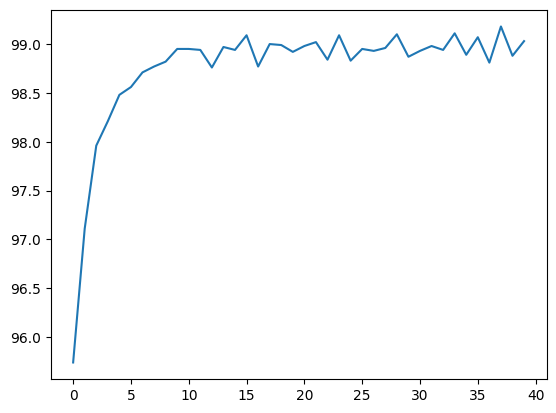

In [22]:
lenet = train(40, device=device)

In [ ]:
torch.save(lenet.state_dict(), "lenet.pth")

In [ ]:
# lenet = create_lenet().to(device)
# lenet.load_state_dict(torch.load("lenet.pth"))
# lenet.eval()

In [ ]:
def predict_dl(model, data):
    y_pred = []
    y_true = []
    for i, (images, labels) in enumerate(data):
        images = images.cuda()
        x = model(images)
        value, pred = torch.max(x, 1)
        pred = pred.data.cpu()
        y_pred.extend(list(pred.numpy()))
        y_true.extend(list(labels.numpy()))
    return np.array(y_pred), np.array(y_true)

In [ ]:
y_pred, y_true = predict_dl(lenet, val_dl)

In [ ]:
pd.DataFrame(confusion_matrix(y_true, y_pred, labels=np.arange(0,10)))

In [18]:

print(torch.cuda.is_available())

False
